In [ ]:
#import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [30]:
#load dataset
df = pd.read_csv("fitness_dataset.csv")

In [31]:
#mengidentifikasi kolom numerik dan kategorikal
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
object_cols = df.select_dtypes(include=['object','category']).columns.tolist()

In [32]:
#1. menampilkan rata rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.
desc = df[numeric_cols].describe().T.rename(columns={"25%":"Q1","50%":"Q2","75%":"Q3"})
stats = desc[["mean","std","min","Q1","Q2","Q3","max"]]
display(stats)

,mean,std,min,Q1,Q2,Q3,max
age,49.114000,17.926564,18.0,34.0000,49.000,65.000,79.00
height_cm,174.533000,14.371750,150.0,162.0000,174.000,187.000,199.00
weight_kg,83.540500,25.852534,30.0,64.0000,83.000,102.000,250.00
heart_rate,70.288600,11.846339,45.0,62.1000,70.250,78.425,118.60
blood_pressure,119.908850,14.578032,90.0,109.7000,120.000,129.800,171.20
sleep_hours,7.513315,1.502031,4.0,6.5000,7.500,8.600,12.00
nutrition_quality,5.035140,2.864156,0.0,2.5475,5.065,7.470,10.00
activity_index,2.999040,1.136383,1.0,2.0375,2.980,3.950,4.99
is_fit,0.399500,0.489918,0.0,0.0000,0.000,1.000,1.00


In [33]:
#2. menampilkan 10 record pertama dari dataset dengan attribute bertipe angka.
display(df[numeric_cols].head(10))

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,1
5,25,172,85,81.2,119.2,7.7,7.35,4.08,0
6,78,193,83,79.6,132.5,7.4,2.16,3.42,0
7,38,188,57,81.2,110.6,6.6,8.47,4.96,1
8,56,164,108,70.1,140.9,9.1,4.15,2.06,0
9,75,198,55,67.1,129.5,8.1,0.36,1.25,0


In [34]:
#3. menampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.
print(f"- Jumlah record: {len(df)}")
print(f"- Jumlah atribut: {df.shape[1]}")
print(f"- Nama atribut: {df.columns.tolist()}")
print(f"- Jumlah atribut numerik: {len(numeric_cols)} (kolom: {numeric_cols})")

- Jumlah record: 2000
- Jumlah atribut: 11
- Nama atribut: ['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure', 'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes', 'gender', 'is_fit']
- Jumlah atribut numerik: 9 (kolom: ['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure', 'sleep_hours', 'nutrition_quality', 'activity_index', 'is_fit'])


In [38]:
#4. menampilkan jumlah label dari semua attribute yang bernilai object
for col in object_cols:
    display(df[col].value_counts(dropna=False))

smokes
yes    711
0      581
no     518
1      190
Name: count, dtype: int64

gender
F    1030
M     970
Name: count, dtype: int64

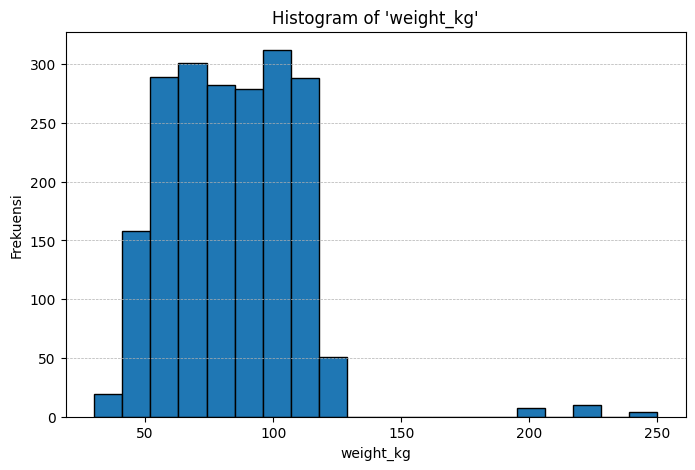

In [36]:
#5. memvisualisasika data menggunakan histogram
if len(numeric_cols) > 0:
    variances = df[numeric_cols].var().sort_values(ascending=False)
    top_col = variances.index[0]
    plt.figure(figsize=(8,5))
    plt.hist(df[top_col].dropna(), bins=20, edgecolor="black")
    plt.title(f"Histogram of '{top_col}'")
    plt.xlabel(top_col)
    plt.ylabel("Frekuensi")
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()

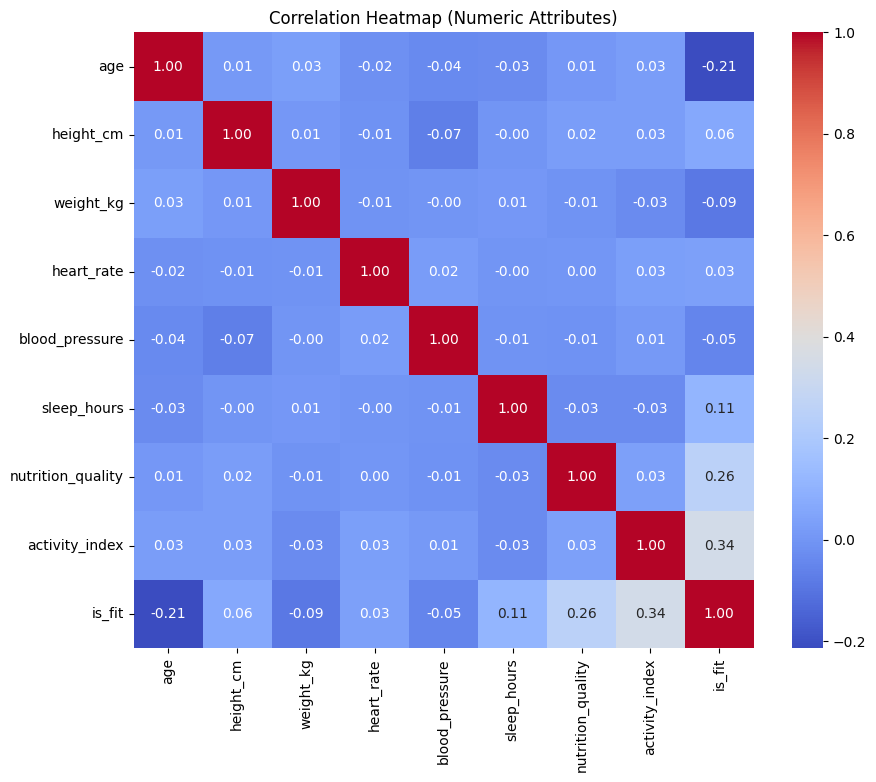

In [37]:
#6. menampilkan korelasi dataset menggunakan heatmap
if len(numeric_cols) > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap (Numeric Attributes)")
    plt.show()

Kesimpulan Analisis dan Visualisasi Dataset fitness
1. Menunjukkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, Q3 data yang bernilai numerik sehingga kita bisa dengan mudah melihat distribusi datanya
2. Dari 10 record pertama atribut numerik dapat di lihat data tersusun dengan rapi dan tidak ada nilai yang terlalu ekstrem
3. Dataset terdiri dari 9 atribut numerik dan 2 atribut objek(sebenarnya is_fit bisa dijadikan kategorikal namun karena memakai (0,1) jadi saya masukkan juga di numerik, untuk kedepannya akan saya sesuaikan lagi apakah baiknya di jadikan numerik atau kategorikal)
4. Menampilkan jumlah label dari atribut yang bernilai objek, yang perlu di perhatikan adalah atribut smokes perlu di bersihkan karena labelnya tidak konsisten karena ada gabungan yes/no dan 0/1. Sisanya sudah baik.
5. Dari histogram bisa dilihat apakah distribusinya normal, miring ke kiri, atau miring ke kanan.
6. Memperlihatkan hubungan antar atribut numerik.
7. Secara umum dataset fitness ini sudah cukup bersih dan bisa di olah untuk posttest kedepannya